In [37]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import json
from desitarget.targetmask import desi_mask


In [93]:
program = "dark_gray"
#program = "bright"
targetdata = fitsio.read("targets/{}_north.fits".format(program))
target_mask = desi_mask["BGS_ANY"]

In [94]:
n = len(targetdata)
r = np.random.random(n)
rr = r < 0.001

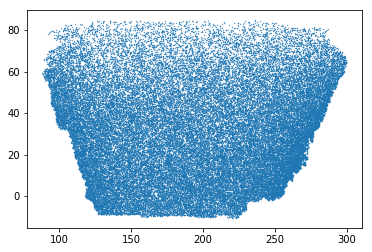

In [95]:
plt.scatter(targetdata['RA'][rr], targetdata['DEC'][rr], s=0.1)

In [96]:
js = open("fba_{}_north/qa.json".format(program)).read()
qa_data = json.loads(js)

In [97]:
tile_ra = []
tile_dec = []
assign_sky = []
assign_science = []
assign_std = []
tile_id = []

for i in qa_data.keys():
    tile_id.append(i)
    tile_ra.append(qa_data[i]['tile_ra'])
    tile_dec.append(qa_data[i]['tile_dec'])
    assign_sky.append(qa_data[i]['assign_sky'])
    assign_std.append(qa_data[i]['assign_std'])
    assign_science.append(qa_data[i]['assign_science'])

tile_id = np.array(tile_id)
assign_std = np.array(assign_std)
assign_sky = np.array(assign_sky)
assign_science = np.array(assign_science)
tile_ra = np.array(tile_ra)
tile_dec = np.array(tile_dec)

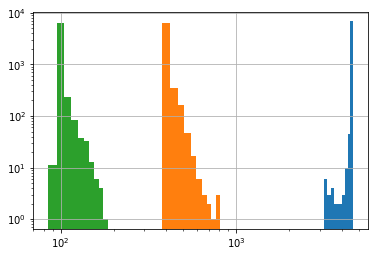

In [98]:
plt.hist(assign_science)
plt.hist(assign_sky)
plt.hist(assign_std)

#plt.plot(assign_sky)
#plt.plot(assign_std)
plt.loglog()
#plt.semilogx()
plt.grid()

Text(0.5,1,'TILES WITH N_SCIENCE<4500')

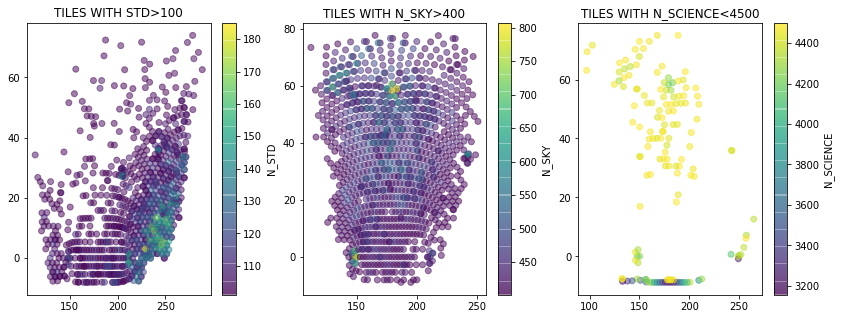

In [102]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
ii = assign_std>100
plt.scatter(tile_ra[ii], tile_dec[ii], c=assign_std[ii], alpha=0.5)
plt.colorbar(label="N_STD")
plt.title("TILES WITH STD>100")

plt.subplot(1,3,2)
ii = assign_sky>400
plt.scatter(tile_ra[ii], tile_dec[ii], c=assign_sky[ii], alpha=0.5)
plt.colorbar(label="N_SKY")
plt.title("TILES WITH N_SKY>400")

plt.subplot(1,3,3)
ii = assign_science<4500
plt.scatter(tile_ra[ii], tile_dec[ii], c=assign_science[ii], alpha=0.5)
plt.colorbar(label="N_SCIENCE")
plt.title("TILES WITH N_SCIENCE<4500")

In [34]:
avail_target = []
assign_target = []
for i in qa_data.keys():
     # stats from the specific target type I am looking for 
    fba_file = "fba_{}_north/fba-{:06d}.fits".format(program, int(i))
    fassign = fitsio.read(fba_file, ext="FASSIGN")
    favail = fitsio.read(fba_file, ext="FAVAIL")
    ii  = np.in1d(targetdata['TARGETID'], favail['TARGETID'])
    n_avail = np.count_nonzero( (targetdata["DESI_TARGET"][ii]&target_mask) != 0)
    n_assign = np.count_nonzero( (fassign["FA_TARGET"]&target_mask) != 0)
    avail_target.append(n_avail)
    assign_target.append(n_assign)
    
assign_target = np.array(assign_target)
avail_target = np.array(avail_target)